# Table of Contents


Put final table of content here

# Business Story 

Predict cancelled flight with this dataset to reduce the cost and preparation 

Predict delated for operational team (Airport) to prepare and reduce customer's complaints 

# Importing 

In [49]:
# DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import *



# # Visualisation and statistic method
import seaborn as sns
import matplotlib.pyplot as plt

# # Data Engineering
import numpy as np
from numpy import *

#Pre-proessing 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



#train_test_split
from sklearn.model_selection import train_test_split


#Machine learning model
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import NuSVR
from sklearn.linear_model import ARDRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier


# Explore the dataset

In [50]:
df = pd.read_csv(r'Airline_Delay_Cause.csv',index_col=0)
# print(data.info())
# print(data.head())

In [51]:
df.head()

,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year,,,,,,,,,,,,,,,,,,,,
2021,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",127.0,9.0,2.51,0.00,3.54,0.0,2.95,0.0,0.0,264.0,119.0,0.0,68.0,0.0,77.0
2021,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",73.0,11.0,5.02,0.00,4.11,0.0,1.87,0.0,0.0,342.0,125.0,0.0,142.0,0.0,75.0
2021,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,8.0,2.63,0.00,4.22,0.0,1.15,0.0,0.0,439.0,156.0,0.0,103.0,0.0,180.0
2021,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",166.0,18.0,8.53,3.25,3.49,0.0,2.74,0.0,1.0,1266.0,291.0,693.0,167.0,0.0,115.0
2021,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",52.0,6.0,3.15,1.88,0.15,0.0,0.82,0.0,0.0,497.0,278.0,180.0,21.0,0.0,18.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1699 entries, 2021 to 2021
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                1699 non-null   int64  
 1   carrier              1699 non-null   object 
 2   carrier_name         1699 non-null   object 
 3   airport              1699 non-null   object 
 4   airport_name         1699 non-null   object 
 5   arr_flights          1697 non-null   float64
 6   arr_del15            1697 non-null   float64
 7   carrier_ct           1697 non-null   float64
 8   weather_ct           1697 non-null   float64
 9   nas_ct               1697 non-null   float64
 10  security_ct          1697 non-null   float64
 11  late_aircraft_ct     1697 non-null   float64
 12  arr_cancelled        1697 non-null   float64
 13  arr_diverted         1697 non-null   float64
 14  arr_delay            1697 non-null   float64
 15  carrier_delay        1697 non-null 

# Data Exploration 

In [53]:
df.describe()

,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,1699.0,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,12.0,325.212139,70.212139,28.939741,2.500212,15.497549,0.277171,22.997584,7.854449,0.809075,4528.553329,1974.441956,282.166765,641.472599,11.854449,1618.617560
std,0.0,879.828737,178.100144,70.852760,10.111829,48.327772,1.409241,66.180720,24.431762,2.289504,12168.859210,5632.949306,1209.321271,2065.861813,67.854003,4663.331528
min,12.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.0,46.000000,8.000000,3.030000,0.000000,0.890000,0.000000,1.720000,0.000000,0.000000,429.000000,154.000000,0.000000,27.000000,0.000000,96.000000
50%,12.0,91.000000,18.000000,7.700000,0.190000,3.040000,0.000000,4.830000,2.000000,0.000000,1141.000000,477.000000,10.000000,116.000000,0.000000,306.000000
75%,12.0,217.000000,51.000000,22.000000,1.780000,9.330000,0.000000,14.490000,6.000000,1.000000,3128.000000,1423.000000,148.000000,355.000000,0.000000,991.000000
max,12.0,16475.000000,2205.000000,834.100000,226.000000,681.530000,41.970000,854.010000,383.000000,38.000000,163565.000000,82981.000000,27876.000000,30955.000000,1978.000000,66536.000000


In [54]:
# for feat in df.columns:
#     if (df[feat].dtype == 'int') or (df[feat].dtype == 'float'): 
#         sns.displot(data = df, x = feat)
#         plt.title(feat)
#         plt.show()
#     elif df[feat].dtype == 'object':
#         sns.countplot(data = df, x = feat)
#         plt.title(feat)
#         plt.show() 

In [55]:
df.columns

Index(['month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

<AxesSubplot:>

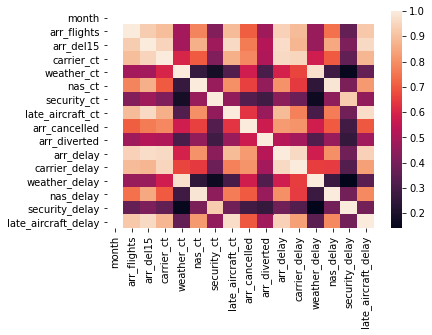

In [56]:
sns.heatmap(data = df.corr())

In [57]:
df.corrwith(df['arr_cancelled']).sort_values()

security_delay         0.289654
security_ct            0.325031
arr_diverted           0.570420
weather_ct             0.577671
weather_delay          0.580660
late_aircraft_ct       0.636360
nas_ct                 0.656773
late_aircraft_delay    0.700047
nas_delay              0.703947
arr_flights            0.711041
arr_del15              0.762626
carrier_ct             0.785701
carrier_delay          0.810593
arr_delay              0.822320
arr_cancelled          1.000000
month                       NaN
dtype: float64

# Pre-Processing 

## Null value

In [58]:
df.isnull().sum()

month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            2
arr_del15              2
carrier_ct             2
weather_ct             2
nas_ct                 2
security_ct            2
late_aircraft_ct       2
arr_cancelled          2
arr_diverted           2
arr_delay              2
carrier_delay          2
weather_delay          2
nas_delay              2
security_delay         2
late_aircraft_delay    2
dtype: int64

In [59]:
df[df['nas_delay'].isnull()]

,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year,,,,,,,,,,,,,,,,,,,,
2021,12,MQ,Envoy Air,MFE,"Mission/McAllen/Edinburg, TX: McAllen Miller I...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,12,YV,Mesa Airlines Inc.,BRO,"Brownsville, TX: Brownsville South Padre Islan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df = df.dropna() 

In [61]:
df.isnull().sum()

month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [62]:
df.describe()

,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,1697.0,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,12.0,325.212139,70.212139,28.939741,2.500212,15.497549,0.277171,22.997584,7.854449,0.809075,4528.553329,1974.441956,282.166765,641.472599,11.854449,1618.617560
std,0.0,879.828737,178.100144,70.852760,10.111829,48.327772,1.409241,66.180720,24.431762,2.289504,12168.859210,5632.949306,1209.321271,2065.861813,67.854003,4663.331528
min,12.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.0,46.000000,8.000000,3.030000,0.000000,0.890000,0.000000,1.720000,0.000000,0.000000,429.000000,154.000000,0.000000,27.000000,0.000000,96.000000
50%,12.0,91.000000,18.000000,7.700000,0.190000,3.040000,0.000000,4.830000,2.000000,0.000000,1141.000000,477.000000,10.000000,116.000000,0.000000,306.000000
75%,12.0,217.000000,51.000000,22.000000,1.780000,9.330000,0.000000,14.490000,6.000000,1.000000,3128.000000,1423.000000,148.000000,355.000000,0.000000,991.000000
max,12.0,16475.000000,2205.000000,834.100000,226.000000,681.530000,41.970000,854.010000,383.000000,38.000000,163565.000000,82981.000000,27876.000000,30955.000000,1978.000000,66536.000000


Todo - finished the log transformation 

# Train/Test Split 

In [63]:
df.columns

Index(['month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [64]:
features = ['arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'arr_flights' ]

target = ['arr_cancelled']

In [65]:
X = df[features]
y = df[target]

In [66]:
X_train,X_test,y_train, y_test =  train_test_split(X,y,test_size = 0.3 , random_state = 42)

In [67]:
std_scaler = StandardScaler().fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

In [68]:
X_test

array([[-0.22241416, -0.20058727, -0.29735805, ...,  0.08302447,
        -0.26802659, -0.24338671],
       [ 0.89149023,  0.73956323, -0.08673781, ...,  0.04393799,
         0.74936396,  1.09912546],
       [-0.16594896, -0.18377049, -0.29735805, ..., -0.16452323,
         0.03630589, -0.1763135 ],
       ...,
       [-0.34561096, -0.32571997, -0.29735805, ..., -0.16452323,
        -0.3159963 , -0.28845152],
       [-0.31994496, -0.33856428, -0.29735805, ..., -0.16452323,
        -0.31914186, -0.31674803],
       [-0.35587736, -0.38742563, -0.29735805, ..., -0.16452323,
        -0.31914186, -0.33456435]])

In [69]:
pca = PCA().fit(X_train)
X_train = pca.transform(X_train)

X_test = pca.transform(X_test)


In [70]:
X_test

array([[-7.08695797e-01,  4.22939385e-01,  5.63992957e-02, ...,
        -1.91320152e-02, -9.19418606e-07, -8.12815208e-18],
       [ 2.25205029e+00,  1.21977104e-01, -9.36566779e-01, ...,
         9.08338501e-02, -4.37027665e-05,  1.33407880e-16],
       [-5.65446220e-01,  3.35144784e-02, -2.50727100e-01, ...,
        -2.72143323e-02,  9.48843447e-08,  1.21771297e-16],
       ...,
       [-1.00925508e+00,  2.51471323e-02, -3.81773093e-02, ...,
        -2.51738950e-03, -5.06317865e-07, -4.61273560e-17],
       [-1.07021971e+00,  5.30084911e-02, -1.09901553e-01, ...,
         2.47736828e-02, -8.54888582e-07, -1.27112169e-16],
       [-1.12416069e+00,  5.55261493e-02, -8.88997666e-02, ...,
        -1.34157959e-02, -9.89265984e-07, -5.62864689e-17]])

# Predictive modelling 

Selection, Train/test, model1, model2 , tuning the model

In [71]:
def model_scorer(X_train,X_test,y_train,y_test):
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
    train_score_knn = knn.score(X_train, y_train)
    test_score_knn = knn.score(X_test, y_test)

    lr = LinearRegression().fit(X_train, y_train)
    train_score_lr = lr.score(X_train, y_train)
    test_score_lr = lr.score(X_test, y_test)


    ard = ARDRegression(normalize=True, alpha_1= 5e-1 , alpha_2= 5e-1,lambda_1= 1e-1, lambda_2= 1e-1 ).fit(X_train, y_train)
    train_score_ard = ard.score(X_train, y_train)
    test_score_ard = ard.score(X_test, y_test)

    score_train = [train_score_knn, train_score_lr, train_score_ard]
    score_test = [test_score_knn, test_score_lr, test_score_ard]
    model = ['knn', 'lr', 'ard']

    score_dict = {
    'train_score':score_train,
    'test_score':score_test
    }

    df_score = pd.DataFrame(score_dict, index = model)
    return df_score

In [72]:
model_scorer(X_train,X_test,y_train,y_test)

/Users/jedsadaluengaramsuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/jedsadaluengaramsuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,train_score,test_score
knn,0.508003,0.276471
lr,0.801694,0.770517
ard,0.808025,0.716296


# Result

Analyze the resutl

# Business insight

How can this code help business in the senarios 